### **Predict Ratings Using Regression Models**

Tasks:   
1. Handle Null data

2. Format columns and values

3. Drop unwanted rows

4. Perform univariate analysis

5. Find percentiles   

6. Perform bivariate analysis   

7. Observe predictors and target variable

8. Regressions


In [1]:
# Using the Python 3 environment with analytics libraries 
#as defined by the kaggle/python docker 

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playstore-analysis/googleplaystore.csv


In [2]:
#other libraries
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import preprocessing

import statsmodels.api as sm 


### 1- Null values

In [3]:
df1=pd.read_csv('../input/playstore-analysis/googleplaystore.csv')
df1

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10837,NaN,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [4]:
#are there NaNs?
df1.isnull().values.any()

True

In [5]:
#how many NaNs?
df1.isnull().sum().sum()

1485

In [6]:
#which columns have NaNs?
df1.isna().any()

Rating             True
App               False
Category          False
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [7]:
#remove rows with NaNs
df2=df1.dropna()

#observe shape change
df2.shape

(9360, 13)

### 2-Variable format

In [8]:
#fix Size column

df2['Size'] = df2['Size'].replace(['Varies with device'],'0k')

#Extract Last character from right of the column 
#and make another one

df2['Measure'] = df2['Size'].str[-1:]

#remove letter
df2['Size']=df2['Size'].replace({'M':'', 'k':'', 'K':''}, regex=True)

#change datatype
df2['Size']=df2['Size'].astype(float)

df2['Size'] = np.where(df2['Measure'] == 'M',
                                           df2['Size'] * 1000,
                                           df2['Size'])


In [9]:
#drop added column
df3=df2.drop(['Measure'], axis=1)

In [10]:
#change datatype for Reviews column
df3['Reviews']=df3['Reviews'].astype(float)

#fix Installs
# remove special character 
df3['Installs'] = df3['Installs'].str.replace('[,,+]', '') 

In [11]:
#change datatype for Installs column
df3['Installs']=df3['Installs'].astype(int)

In [12]:
#fix Price
df3['Price'] = df3['Price'].str.replace('[$]', '') 
#change datatype 
df3['Price']=df3['Price'].astype(float)

In [13]:
#verify
df3.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### 3-Remove Unwanted Rows 

In [14]:
# delete all rows with Ratings outside the 1-5 range
indexOut = df3[ (df3['Rating'] < 0) & (df3['Rating'] > 5) ].index
df3.drop(indexOut , inplace=True)

In [15]:
#verify
df3.shape

(9360, 13)

In [16]:
# delete Review rows that exceed Installs
df3 = df3[df3['Reviews'] <= df3['Installs']]

In [17]:
#verify
df3.shape

(9353, 13)

In [18]:
# get indexes where free Types have a price over 0 
indexOut2 = df3[(df3['Price'] >= 0.1) & (df3['Type'] == 'Free')].index 
  
# drop these row 
df3.drop(indexOut2, inplace = True) 
#verify  
df3.shape

(9353, 13)

### 4-Univariate analysis

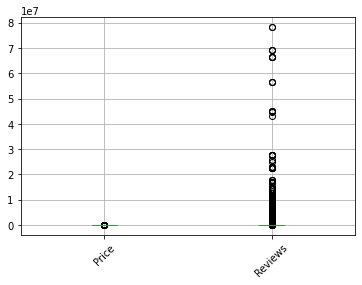

In [19]:
#find possible outliers
#boxplot Price and Review columns
boxplot = df3.boxplot(column=['Price','Reviews'], rot=45)

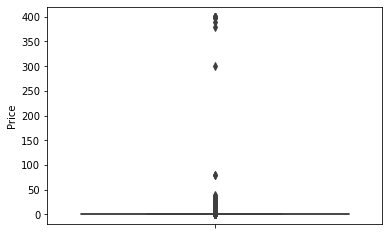

In [20]:
#verify individually
sns.boxplot(y=df3["Price"])

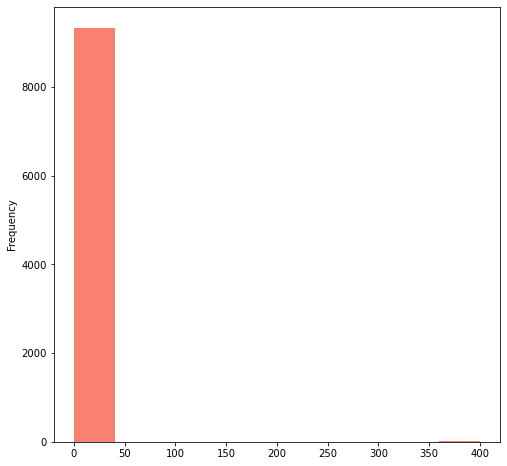

In [21]:
#Price Histogram
df3.Price.plot.hist(color='salmon', figsize=(8,8))

In [22]:
df3["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

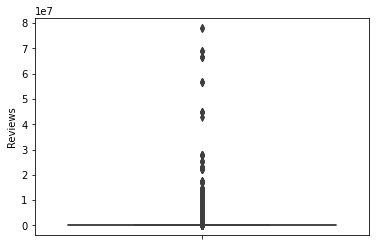

In [23]:
sns.boxplot(y=df3["Reviews"])

In [24]:
df3["Reviews"].describe()

count    9.353000e+03
mean     5.147606e+05
std      3.146169e+06
min      1.000000e+00
25%      1.870000e+02
50%      5.967000e+03
75%      8.174700e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [25]:
df3["Reviews"].value_counts().head(10)

2.0     81
3.0     78
5.0     74
4.0     73
1.0     67
6.0     62
7.0     61
8.0     57
12.0    53
10.0    46
Name: Reviews, dtype: int64

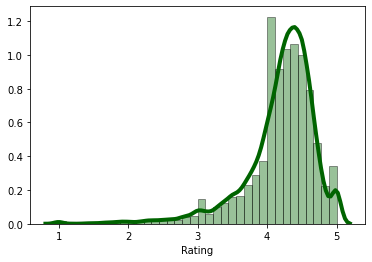

In [26]:
# Density Plot and Histogram of ratings
sns.distplot(df3['Rating'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

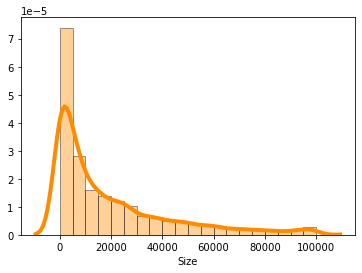

In [27]:
# Density Plot and Histogram of Size
sns.distplot(df3['Size'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

**Outliers**   
1- Price   
Those apps over $100 seems to be outliers.   
2- Reviews   
The mean of Reviews is 514760.6 with a standard deviation of 3146169 between values.   
This seems as a large discrepancy between values, and perhaps several outliers.   
3- Rating   
Most apps lean towards HIGH rates.   
4- Size   
Most apps' size are below 20,000.   


In [28]:
#drop Price rows at 200 and higher
df4=df3[df3['Price'] < 200]
#verify
df4.shape

(9338, 13)

In [29]:
#Drop Review rows with over 2 million reviews
df4=df4[df4['Reviews'] <= 2000000]
#verify
df4.shape

(8885, 13)

In [30]:
#drop rows with 100,000,000 and more Installs
df4=df4[df4['Installs'] <= 100000000]
#verify
df4.shape

(8865, 13)

### 5- Percentiles

In [31]:
percentiles=df4[['Rating','Reviews','Size','Installs','Price']]

In [32]:
#10, 25, 50, 70, 90, 95, 99 percentiles
print("10th percentile : ",
       np.percentile(percentiles, 10))

print("25th percentile : ",
       np.percentile(percentiles, 25))

print("50th percentile : ", 
       np.percentile(percentiles, 50))

print("70th percentile : ",
       np.percentile(percentiles, 70))

print("90th percentile : ",
       np.percentile(percentiles, 90))
print("95th percentile : ",
       np.percentile(percentiles, 95))
print("99th percentile  : ",
       np.percentile(percentiles, 99))

10th percentile :  0.0
25th percentile :  3.5
50th percentile :  246.0
70th percentile :  14000.0
90th percentile :  549517.5999999993
95th percentile :  5000000.0
99th percentile  :  10000000.0


### 6- Bivariate analysis

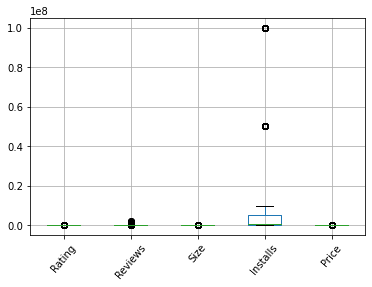

In [33]:
#find other outliers with boxplots 
percentiles.boxplot(rot=50)

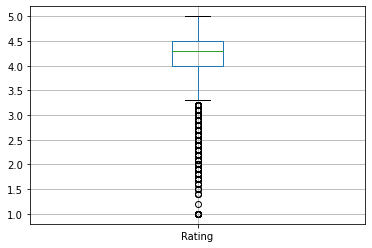

In [34]:
percentiles.boxplot(column=['Rating'])

In [35]:
#remove outliers
indexOut3 = df4[(df4['Rating'] < 3.5) ].index
df4.drop(indexOut3 , inplace=True)

In [36]:
df4.shape

(8134, 13)

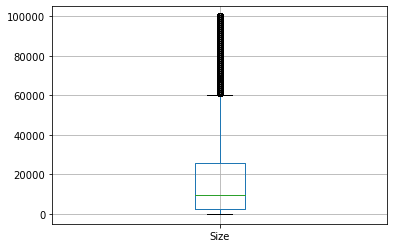

In [37]:
percentiles.boxplot(column=['Size'])

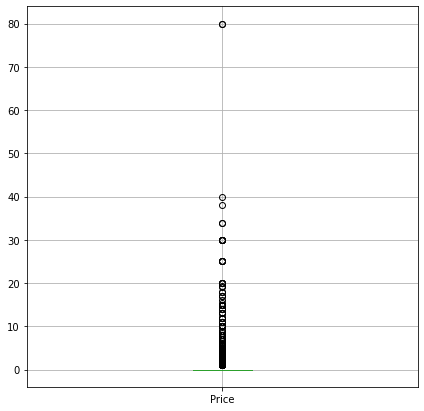

In [38]:
percentiles.boxplot(column=['Price'], figsize=(7,7))

In [39]:
#remove outliers
indexOut4 = df4[(df4['Price'] > 40)].index
df4.drop(indexOut4 , inplace=True)
#verify
df4.shape

(8132, 13)

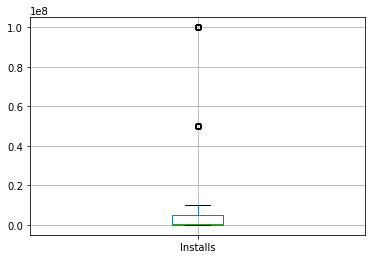

In [40]:
percentiles.boxplot(column=['Installs'])

In [41]:
#remove outliers
indexOut5 = df4[(df4['Installs'] >= 100000000)].index
df4.drop(indexOut5 , inplace=True)
#verify
df4.shape

(8010, 13)

### 7- Possible Predictors: 'App', 'Category', 'Reviews', 'Size', 'Installs', 'Type','Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver','Android Ver'      
Target variable: 'Rating'

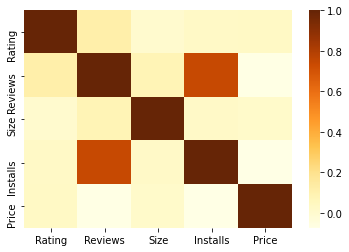

In [42]:
#correlation graph
corr1=df4.corr()
sns.heatmap(corr1, cmap="YlOrBr")

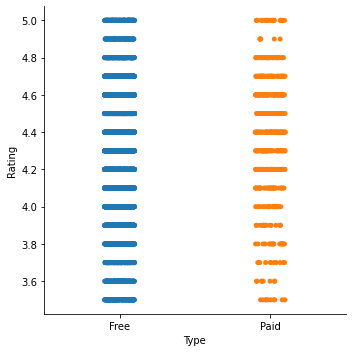

In [43]:
sns.catplot(x="Type", y="Rating", data=df4)

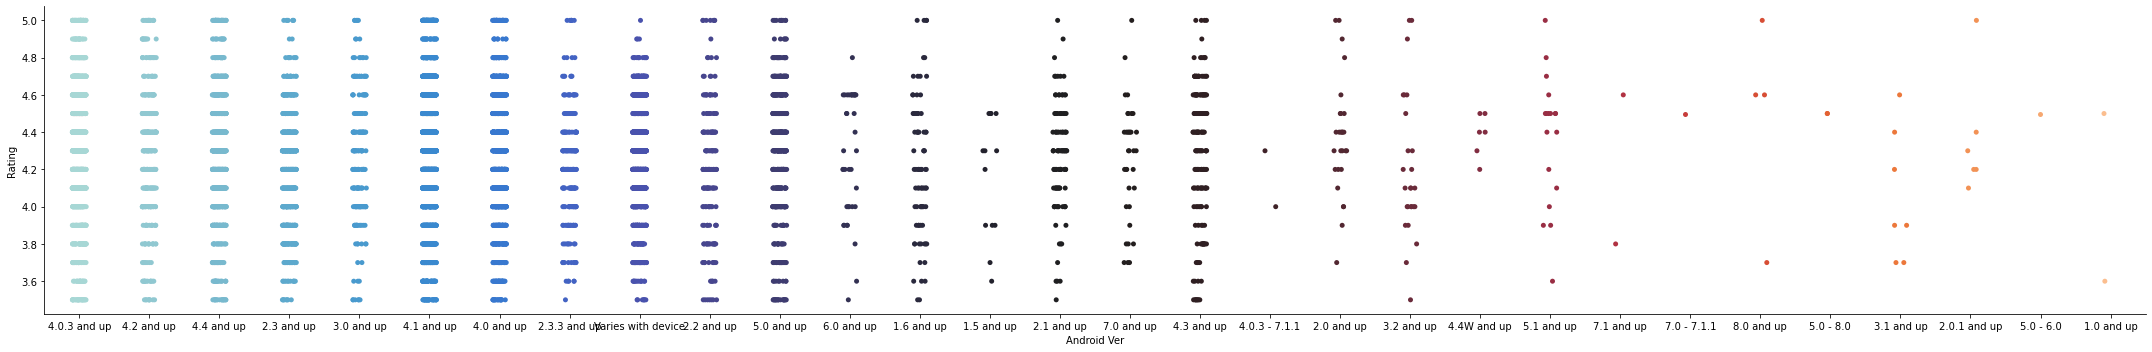

In [44]:
# 'Android Ver' and Rating
c=sns.catplot(x="Android Ver", y="Rating", data=df4, palette ='icefire', height=5, aspect=6)

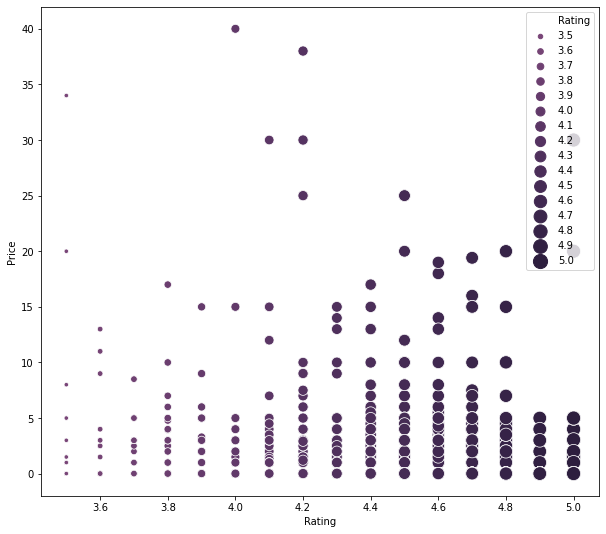

In [45]:
#Scatter plot for Rating vs. Price
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=df4, x="Rating", y="Price", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(0, 5), legend="full")

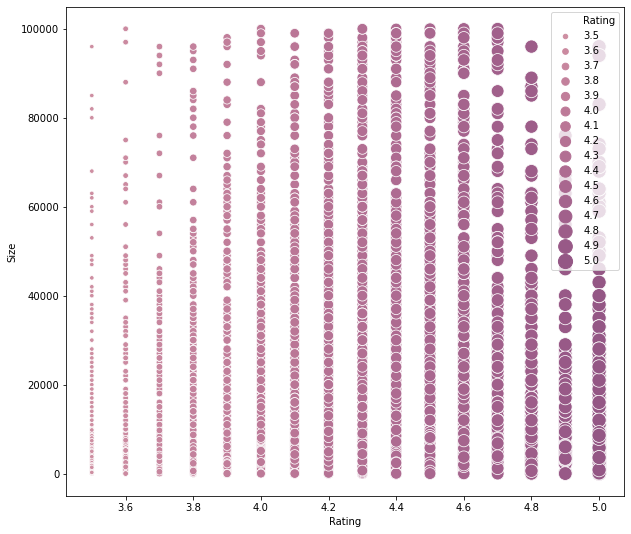

In [46]:
#Scatter plot for Rating vs. Size
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=df4, x="Rating", y="Size", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(2, 7), legend="full")

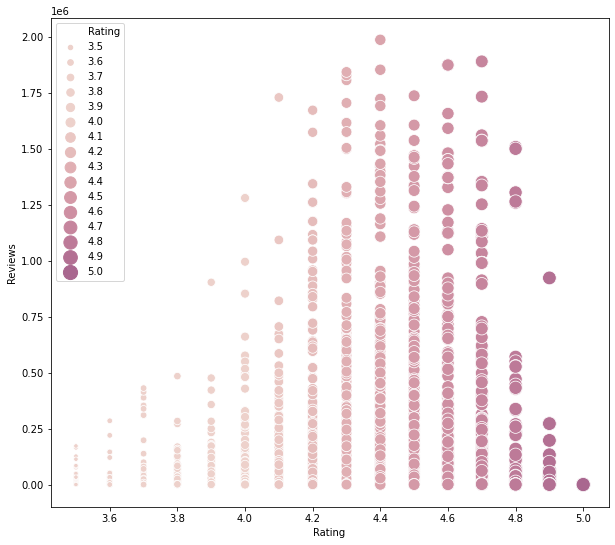

In [47]:
#Scatter plot for Rating vs. Price

plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=df4, x="Rating", y="Reviews", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(4, 6), legend="full")

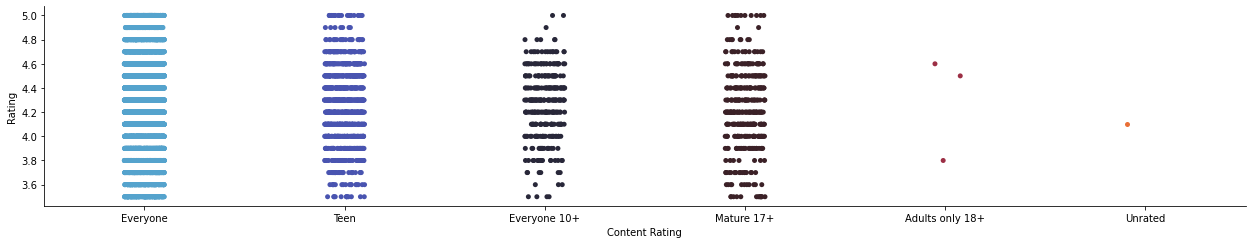

In [48]:
# 'Content Rating' and Price
c=sns.catplot(x="Content Rating", y="Rating", data=df4, palette ='icefire', height=3.5, aspect=5)

[None, None, None, None, None, None, None, None, None, None, None, None]

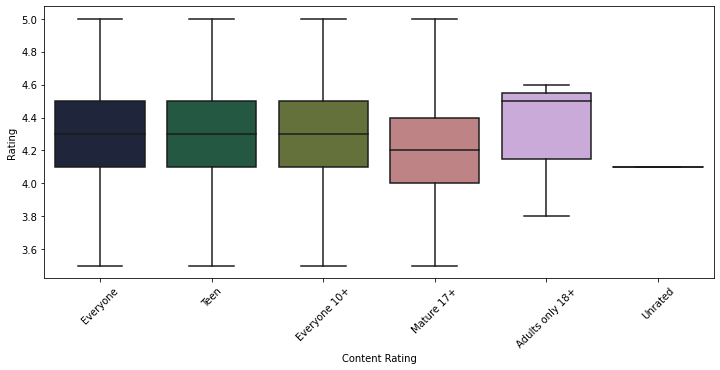

In [49]:
plt.figure(figsize=(12, 5))
r=sns.boxplot(x ='Content Rating', y ='Rating', data = df4, palette ='cubehelix') 
plt.setp(r.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

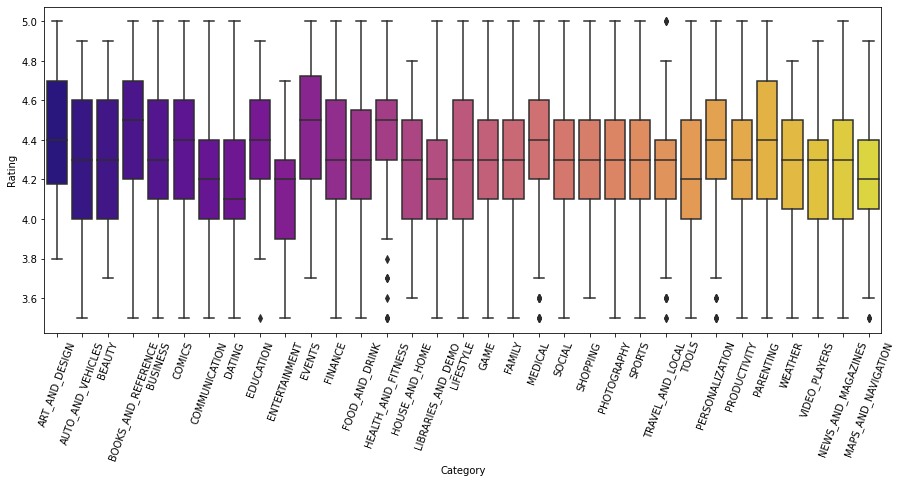

In [50]:
# Plot category in relation to rating
plt.figure(figsize=(15, 6))
g=sns.boxplot(x ='Category', y ='Rating', data = df4, palette ='plasma') 
plt.setp(g.get_xticklabels(), rotation=70)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

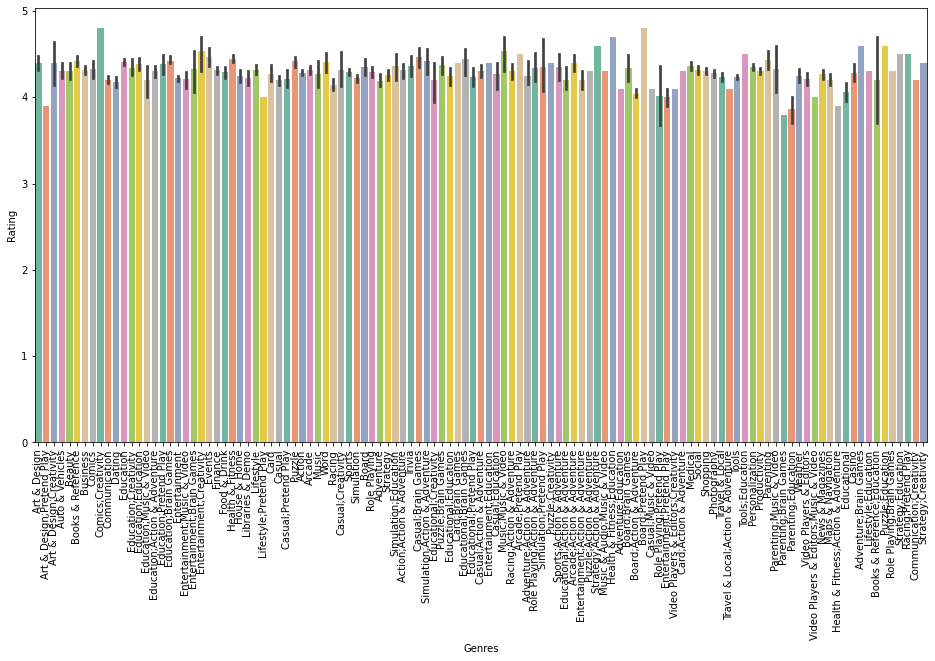

In [51]:
# Plot categorical data in relation to Genres
plt.figure(figsize=(16, 8))
g=sns.barplot(x ='Genres', y ='Rating', data = df4, palette ='Set2') 
plt.setp(g.get_xticklabels(), rotation=90)

### **Observations**:   
1.App, Last Updated, Current Ver, and Genres have too many unique entries to plot.   
2.Possible relationships between some elements in Rating and Type, Rating and Content Ratings, and Rating and Android Ver. But none obvious.      
3.Between Price and Rating:         
-Most data concentrates within Ratings 4.4 to 5.0 and Price between 0 and 10.   
-Price does not mean better ratings.   
4.Rating and Size:   
-Entries seem evenly distributed throughout sizes.   
-Heavier ones rate around 4.4 to 4.8.   
-Lighter ones rate better than heavier ones.   
5.Rating and Reviews:   
-Amount of reviews do not always mean better ratings.    
6.Rating and Content Rating:  
-There does not seem to be a difference between Content Ratings in relation to Ratings.   
7.Category and Rating:   
-No visible changes between categories in relation to ratings.  
8.Genres and Rating:   
-Comics/Creativity and Board Pretend Play rate highest.



### 8- Regression

In [52]:
df4.describe()

,Rating,Reviews,Size,Installs,Price
count,8010.000000,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,4.294931,9.734010e+04,18966.825031,3.755792e+06,0.334087
std,0.335667,2.408202e+05,22603.414078,8.968026e+06,1.866648
min,3.500000,1.000000e+00,0.000000,5.000000e+00,0.000000
25%,4.100000,2.110000e+02,2700.000000,1.000000e+04,0.000000
50%,4.300000,6.030500e+03,9800.000000,5.000000e+05,0.000000
75%,4.500000,6.122275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,1.986068e+06,100000.000000,5.000000e+07,39.990000


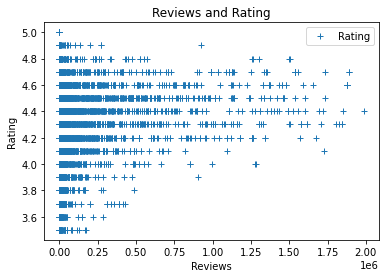

In [53]:
df4.plot(x='Reviews', y='Rating', style='+')  
plt.title('Reviews and Rating')  
plt.xlabel('Reviews')  
plt.ylabel('Rating')  
plt.show()

In [54]:
X = df4['Reviews'].values.reshape(-1,1)
y = df4['Rating'].values.reshape(-1,1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [56]:
reg1 = LinearRegression()  
reg1.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [57]:
reg1.intercept_

array([4.27681038])

In [58]:
reg1.coef_

array([[1.78042067e-07]])

In [59]:
y_pred = reg1.predict(X_test)

In [60]:
dfReg1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfReg1

,Actual,Predicted
0,4.4,4.280908
1,4.7,4.276833
2,4.0,4.293601
3,4.0,4.281224
4,4.5,4.314667
...,...,...
2398,4.4,4.337539
2399,4.3,4.280846
2400,4.0,4.306371
2401,4.4,4.280865


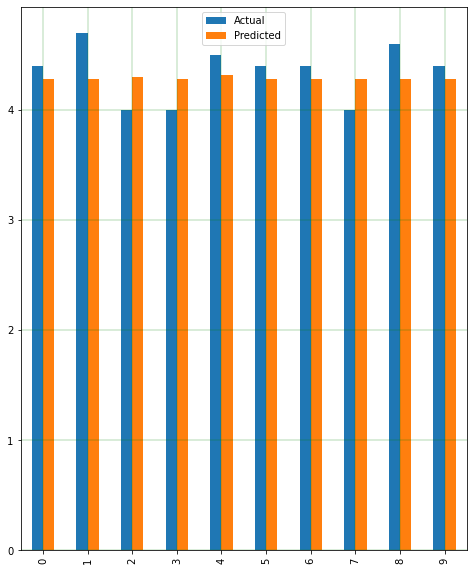

In [61]:
top10=dfReg1.head(10)
top10.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

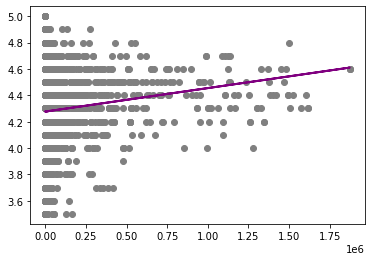

In [62]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='purple', linewidth=2)
plt.show()

In [63]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)

('Mean Absolute Error:', 0.25950948945655544)

In [64]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)

('Mean Squared Error:', 0.10710049515222463)

In [65]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('Root Mean Squared Error:', 0.3272621199470306)

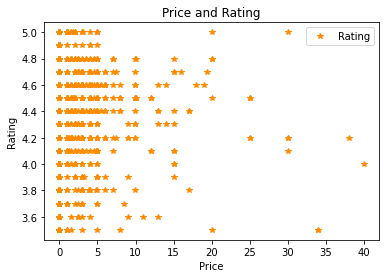

In [66]:
#Price variable
df4.plot(x='Price', y='Rating', style='*', color='darkorange')  
plt.title('Price and Rating')  
plt.xlabel('Price')  
plt.ylabel('Rating')  
plt.show()

In [67]:
X = df4['Reviews'].values.reshape(-1,1)
y = df4['Rating'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
reg3 = LinearRegression()  
reg3.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [68]:
reg3.intercept_

array([4.27958942])

In [69]:
reg3.coef_

array([[1.61676335e-07]])

In [70]:
y_pred = reg3.predict(X_test)

In [71]:
dfReg3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfReg3

,Actual,Predicted
0,5.0,4.279590
1,4.0,4.280991
2,4.0,4.290764
3,4.3,4.293475
4,3.9,4.280082
...,...,...
1597,4.5,4.281917
1598,3.5,4.279592
1599,3.6,4.279597
1600,4.8,4.279591


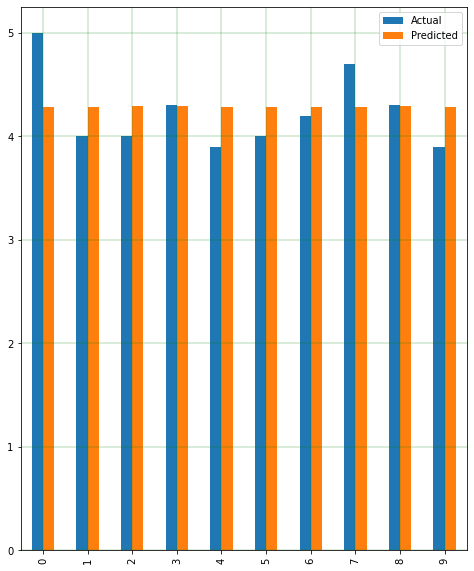

In [72]:
top10=dfReg3.head(10)
top10.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

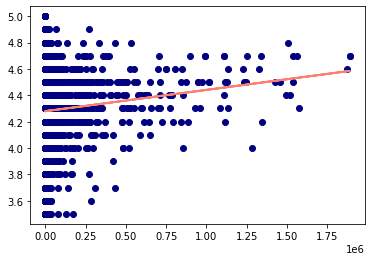

In [73]:
plt.scatter(X_test, y_test,  color='navy')
plt.plot(X_test, y_pred, color='salmon', linewidth=2)
plt.show()

In [74]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)

('Mean Absolute Error:', 0.2669556985342403)

In [75]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)

('Mean Squared Error:', 0.11163146483839984)

In [76]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('Root Mean Squared Error:', 0.3341129522158634)

In [77]:
#ordinary least squares (OLS)
#is a linear least squares method to estimate the unknown parameters in a linear regression model

X = df4[['Reviews' , 'Installs']]
y = df4['Rating']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.166
Model:                            OLS   Adj. R-squared (uncentered):              0.166
Method:                 Least Squares   F-statistic:                              796.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                   3.27e-316
Time:                        14:39:03   Log-Likelihood:                         -22338.
No. Observations:                8010   AIC:                                  4.468e+04
Df Residuals:                    8008   BIC:                                  4.469e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reviews     3.386e-06   2.73e-07     12.408      0.000    2.85e-06    3.92e-06
Installs    1.006e-07   7.29e-09     13.795      0.000    8.63e-08    1.15e-07
==============================================================================
Omnibus:                     5953.121   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90856.231
Skew:                          -3.553   Prob(JB):                         0.00
Kurtosis:                      17.891   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
dfReg2 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
dfReg2

,Actual,Predicted
0,4.1,0.001544
1,3.9,0.053567
2,4.7,0.799267
3,4.5,5.759467
4,4.3,0.013333
...,...,...
10833,4.0,0.000074
10835,4.5,0.000632
10836,5.0,0.000024
10838,4.5,0.000487


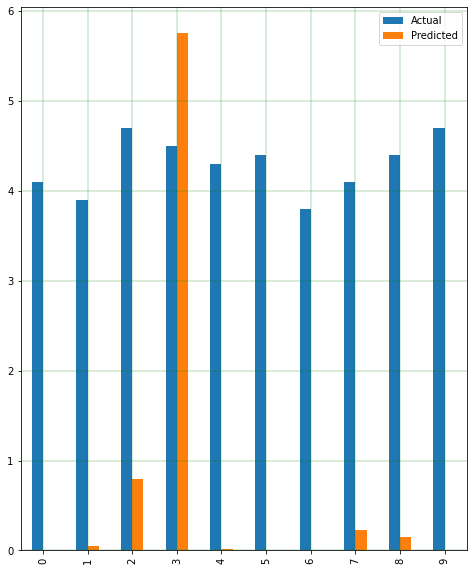

In [79]:
top10=dfReg2.head(10)
top10.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### KNN

In [80]:
#Encode label data
#create labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Genres_enc =le.fit_transform(df4.Genres)
Cat_enc =le.fit_transform(df4.Category)

#verify
Genres_enc

array([ 9, 11,  9, ..., 37, 18, 65])

In [81]:
Cat_enc

array([ 0,  0,  0, ..., 11,  3, 18])

In [82]:
#convert other label columns
Type_enc =le.fit_transform(df4['Type'])

In [83]:
Type_enc

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
##Rating encoding
#Ratings are FLOAT and need to be non-continuous for KNN

Rate_enc=le.fit_transform(df4['Rating'])

#categorize Installs
Ins_enc=le.fit_transform(df4['Installs'])


AndrdV_enc=le.fit_transform(df4['Android Ver'])

In [85]:
AndrdV_enc

array([14, 14, 14, ..., 15, 29, 29])

In [86]:
Rate_enc

array([ 6,  4, 12, ..., 15, 10, 10])

In [87]:
Ins_enc

array([ 7, 10, 12, ...,  3,  5, 13])

In [88]:
#combining type, android version, Genres
features=list(zip(Genres_enc, Cat_enc, Type_enc, Ins_enc, AndrdV_enc))

In [89]:
features

[(9, 0, 0, 7, 14),
 (11, 0, 0, 10, 14),
 (9, 0, 0, 12, 14),
 (9, 0, 0, 14, 16),
 (10, 0, 0, 9, 18),
 (9, 0, 0, 8, 7),
 (9, 0, 0, 8, 14),
 (9, 0, 0, 11, 16),
 (9, 0, 0, 11, 9),
 (10, 0, 0, 7, 14),
 (9, 0, 0, 11, 15),
 (9, 0, 0, 11, 12),
 (9, 0, 0, 13, 15),
 (9, 0, 0, 9, 18),
 (9, 0, 0, 9, 7),
 (9, 0, 0, 10, 15),
 (9, 0, 0, 7, 7),
 (9, 0, 0, 12, 14),
 (9, 0, 0, 13, 15),
 (9, 0, 0, 9, 15),
 (9, 0, 0, 9, 14),
 (9, 0, 0, 10, 14),
 (9, 0, 0, 8, 15),
 (9, 0, 0, 7, 9),
 (10, 0, 0, 10, 14),
 (9, 0, 0, 9, 14),
 (9, 0, 0, 7, 7),
 (9, 0, 0, 9, 7),
 (9, 0, 0, 9, 14),
 (9, 0, 0, 8, 7),
 (9, 0, 0, 9, 12),
 (9, 0, 0, 9, 15),
 (9, 0, 0, 7, 15),
 (9, 0, 0, 9, 15),
 (10, 0, 0, 10, 18),
 (9, 0, 0, 12, 8),
 (9, 0, 0, 7, 14),
 (9, 0, 0, 10, 12),
 (9, 0, 0, 7, 14),
 (9, 0, 0, 9, 14),
 (9, 0, 0, 13, 29),
 (10, 0, 0, 9, 15),
 (9, 0, 0, 7, 15),
 (9, 0, 0, 13, 15),
 (9, 0, 0, 9, 15),
 (9, 0, 0, 9, 15),
 (9, 0, 0, 9, 7),
 (12, 1, 0, 9, 14),
 (12, 1, 0, 11, 15),
 (12, 1, 0, 9, 15),
 (12, 1, 0, 11, 29),
 (12, 1, 0,

In [90]:
#scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [91]:
X = scaler.transform(X)

In [92]:
#model

from sklearn.neighbors import KNeighborsClassifier

# Create feature and target arrays 
X = features
y = Rate_enc 
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.4, random_state=10) 
  
knn = KNeighborsClassifier(n_neighbors=6) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 


[ 6 12  9 ...  0 11  8]


In [93]:
# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 

0.15823970037453183


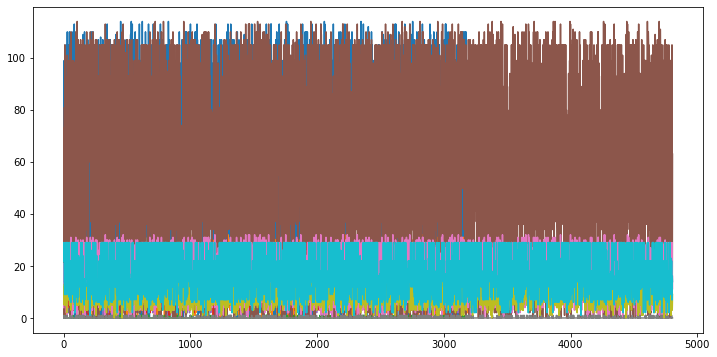

In [94]:
# Generate plot 
plt.figure(figsize=(12, 6))
plt.plot(X_test) 
plt.plot(X_train)   

plt.show() 

There are no obvious relationship between Ratings of games and the variables offered here.